# 8장. 이미지를 분류합니다

이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/do-it-dl/blob/master/Ch08.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/do-it-dl/blob/master/Ch08.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

이 노트북을 실행하려면 텐서플로 2.0.0-alpha0 버전 이상이 필요합니다.

## 08-5 케라스로 합성곱 신경망 모델을 만듭니다.

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [ ]:
x_train.shape

(48000, 28, 28, 1)

In [ ]:
x_train = x_train / 255
x_val = x_val / 255

In [ ]:
#Flastten : 케라스 API, 가중치 없고 펼치는 역할
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
conv1 = tf.keras.Sequential() # 시퀀셜 사용
# 필터 10개
# 입력 지정
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
# 맥스풀링
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
# 출력층, 다중출력
conv1.add(Dense(10, activation='softmax'))

In [ ]:
conv1.summary()
# 깊이 10
# 합성곱층 가중치 100개
# 필터하나당 10개 가중치 (3*3+1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1960)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               196100    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [ ]:
# 옵티마이저 : 아담

conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 훈련
# y는 one-hot
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0368 - accuracy: 0.9872 - val_loss: 0.4109 - val_accuracy: 0.9143
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0339 - accuracy: 0.9885 - val_loss: 0.4205 - val_accuracy: 0.9146
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0279 - accuracy: 0.9905 - val_loss: 0.4365 - val_accuracy: 0.9156
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0288 - accuracy: 0.9899 - val_loss: 0.4665 - val_accuracy: 0.9172
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0246 - accuracy: 0.9911 - val_loss: 0.5082 - val_accuracy: 0.9113
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0247 - accuracy: 0.9914 - val_loss: 0.4922 - val_accuracy: 0.9134
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0236 - accuracy: 0.9917 - val_loss: 0.4998 - val_accurac

In [ ]:
import matplotlib.pyplot as plt

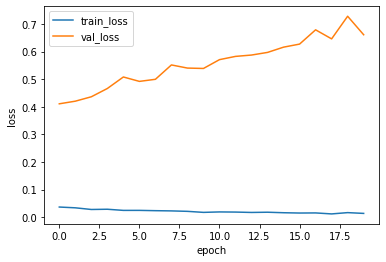

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# 훈련손실 급격히 감소, 검증세트 손실 급격히 증가 : 과대적합

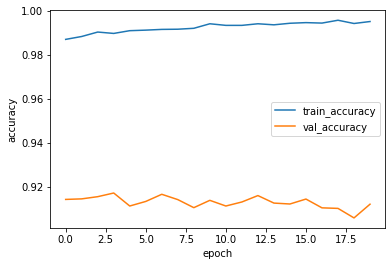

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = conv1.evaluate(x_val, y_val_encoded, verbose=0)

In [ ]:
print(accuracy)

0.9121666550636292


In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
# 드롭아웃 적용 : 과대 적합 방지
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
# 0.5의 드롭 아웃
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [ ]:
conv2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1960)              0         
                                                                 
 dropout (Dropout)           (None, 1960)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               196100    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [ ]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5117 - accuracy: 0.8176 - val_loss: 0.3646 - val_accuracy: 0.8720
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3758 - accuracy: 0.8642 - val_loss: 0.3180 - val_accuracy: 0.8814
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3331 - accuracy: 0.8786 - val_loss: 0.2828 - val_accuracy: 0.8952
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3076 - accuracy: 0.8881 - val_loss: 0.2687 - val_accuracy: 0.9022
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2849 - accuracy: 0.8939 - val_loss: 0.2613 - val_accuracy: 0.9047
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2692 - accuracy: 0.9000 - val_loss: 0.2505 - val_accuracy: 0.9083
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2564 - accuracy: 0.9039 - val_loss: 0.2527 - val_accuracy:

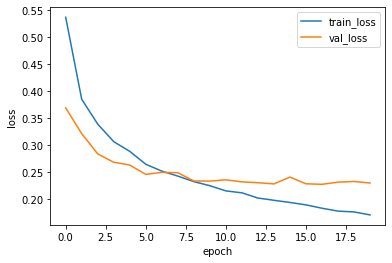

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()
# 격차가 크지 않고 완만하게 감소

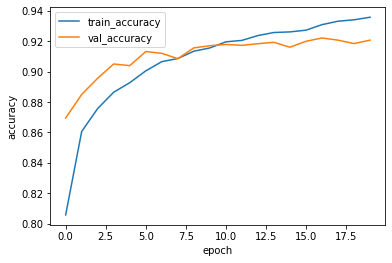

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = conv2.evaluate(x_val, y_val_encoded, verbose=0)

In [ ]:
print(accuracy)

0.9206666946411133
